In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'AppleGothic'

/var/folders/p6/zn1thsjj39x22wz5h1vhtxlh0000gn/T/ipykernel_35036/2414259183.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('/Users/jeong-yula/Downloads/open/train.csv')


In [3]:
def year_encoder(x):
    output = x.replace('years', '')
    output = output.replace('year', '')
    output = output.replace('+', '')
    output = output.replace('<', '')
    output = output.replace('Unknown', '-1').strip()
    output = int(output)

    return output

df['근로기간'] = df['근로기간'].apply(year_encoder)

In [4]:
drop_index = df[df['주택소유상태'] == 'ANY'].index
df = df.drop(drop_index)

<Axes: xlabel='근로기간', ylabel='대출금액'>

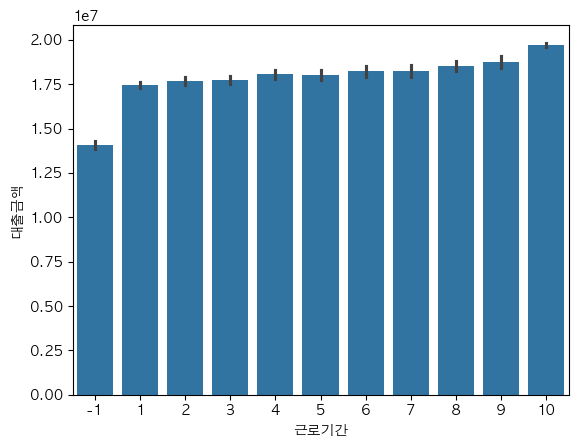

In [6]:
sns.barplot(x='근로기간',y='대출금액',data=df)

<Axes: xlabel='근로기간', ylabel='연간소득'>

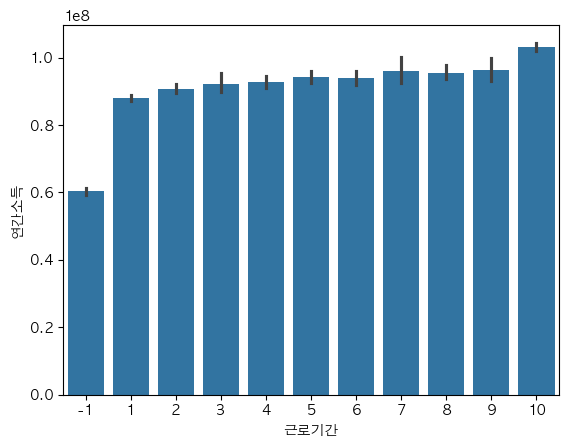

In [7]:
sns.barplot(x='근로기간',y='연간소득',data=df)

<Axes: xlabel='근로기간', ylabel='부채_대비_소득_비율'>

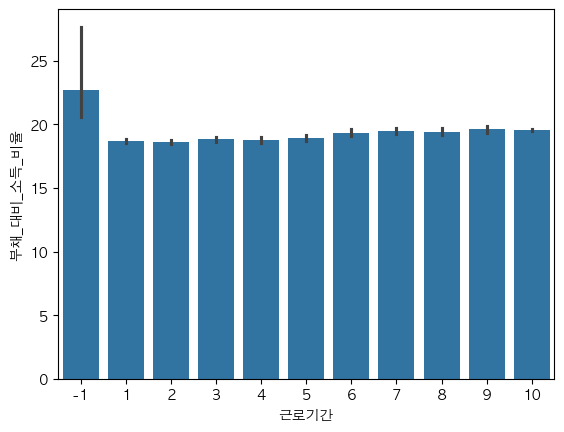

In [8]:
sns.barplot(x='근로기간',y='부채_대비_소득_비율',data=df)

<Axes: xlabel='근로기간', ylabel='총계좌수'>

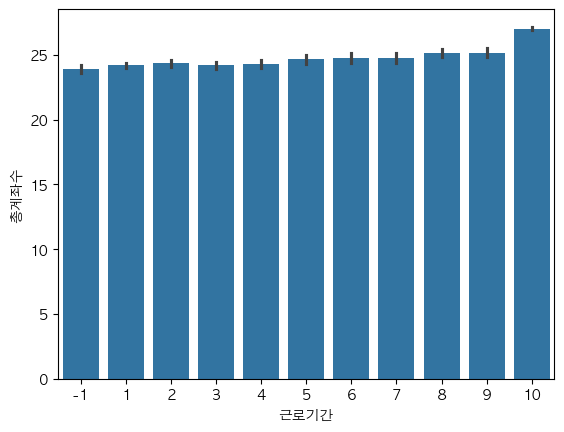

In [9]:
sns.barplot(x='근로기간',y='총계좌수',data=df)

<Axes: xlabel='근로기간', ylabel='최근_2년간_연체_횟수'>

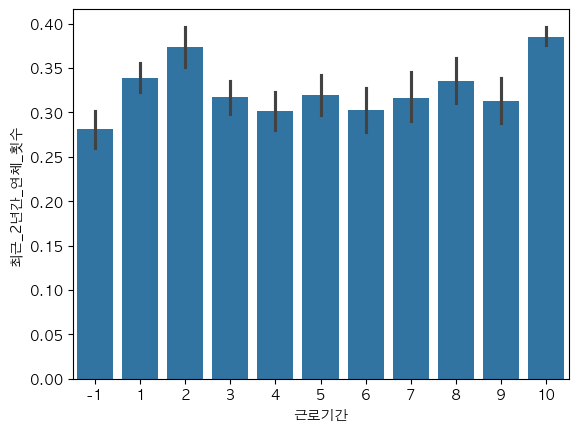

In [10]:
sns.barplot(x='근로기간',y='최근_2년간_연체_횟수',data=df)

<Axes: xlabel='근로기간', ylabel='총상환원금'>

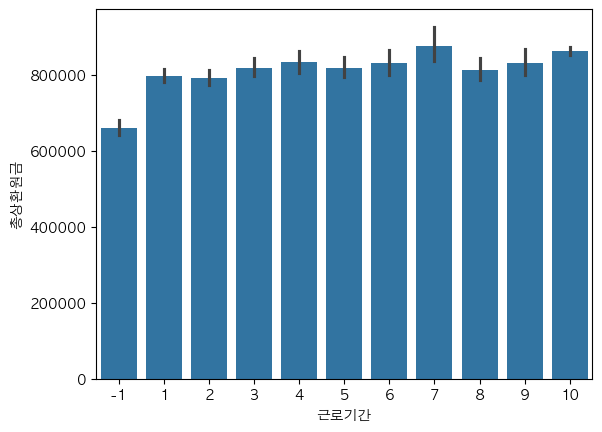

In [11]:
sns.barplot(x='근로기간',y='총상환원금',data=df)

<Axes: xlabel='근로기간', ylabel='총상환이자'>

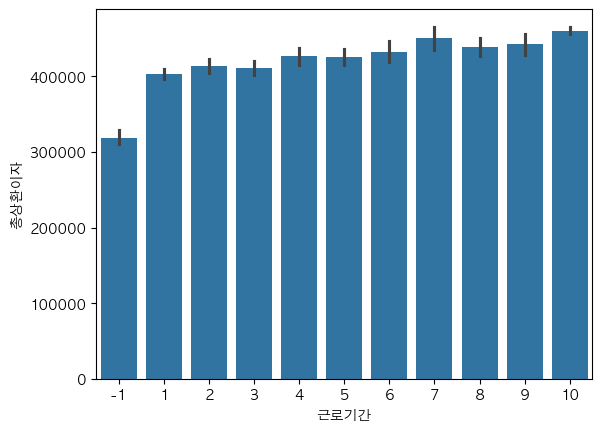

In [12]:
sns.barplot(x='근로기간',y='총상환이자',data=df)

<Axes: xlabel='근로기간', ylabel='총연체금액'>

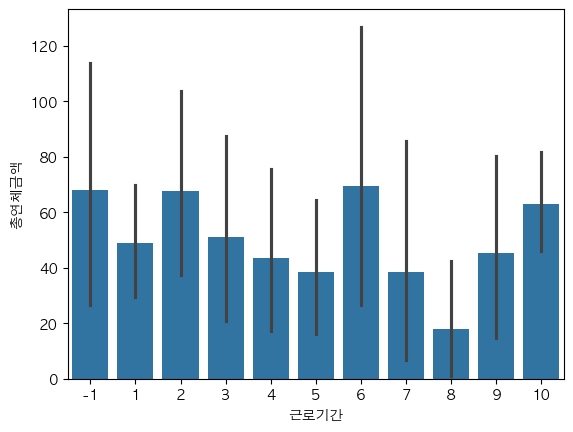

In [13]:
sns.barplot(x='근로기간',y='총연체금액',data=df)

<Axes: xlabel='근로기간', ylabel='연체계좌수'>

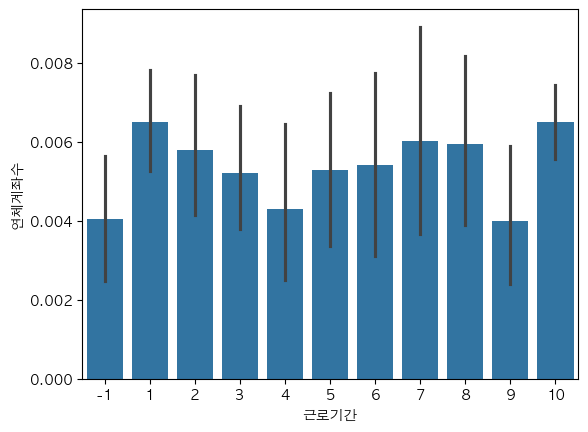

In [14]:
sns.barplot(x='근로기간',y='연체계좌수',data=df)

In [15]:
pivot_table =df.pivot_table(index='주택소유상태', columns='근로기간',values='연간소득')
pivot_table

근로기간,-1,1,2,3,4,5,6,7,8,9,10
주택소유상태,,,,,,,,,,,
MORTGAGE,7.231165e+07,1.047041e+08,1.072592e+08,1.064265e+08,1.064138e+08,1.081932e+08,1.058144e+08,1.106980e+08,1.054312e+08,1.038596e+08,1.112701e+08
OWN,5.228145e+07,8.241769e+07,8.330867e+07,9.083876e+07,8.829770e+07,8.829287e+07,9.033262e+07,9.103198e+07,9.468058e+07,9.055142e+07,9.712264e+07
RENT,4.986964e+07,7.705189e+07,7.901285e+07,8.036156e+07,8.043835e+07,8.076898e+07,7.982239e+07,7.922700e+07,8.166288e+07,8.679311e+07,8.719787e+07


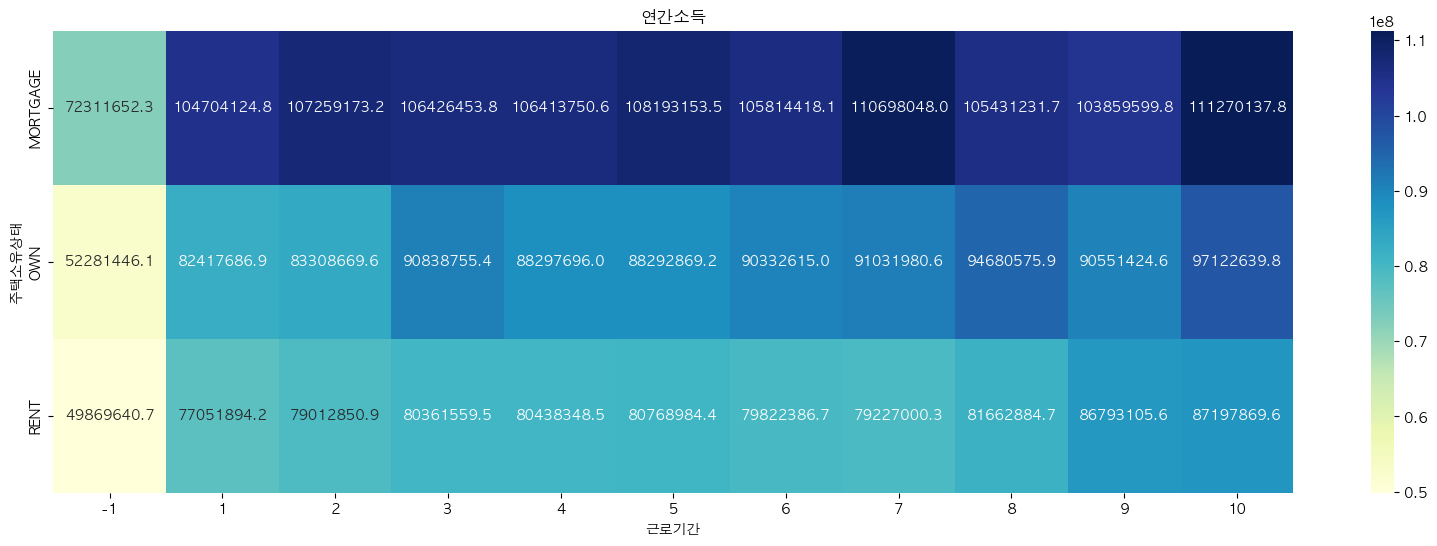

In [17]:
plt.figure(figsize=(20, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('연간소득')
plt.xlabel('근로기간')
plt.ylabel('주택소유상태')
plt.show()